In [9]:
# Import packages
import holoviews as hv
import hvplot.pandas

# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

import earthpy
import pandas as pd

In [3]:
# Download data notebook
Konza_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USW00053974'
    '&startDate=2004-01-01'
    '&endDate=2024-12-31'
    '&units=standard')
Konza_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00053974&startDate=2004-01-01&endDate=2024-12-31&units=standard'

In [4]:
# Download the climate data
Konza_climate_df = pd.read_csv(
    Konza_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
Konza_climate_df.head()

,STATION,PRCP
DATE,,
2004-01-01,USW00053974,0.00
2004-01-02,USW00053974,0.00
2004-01-03,USW00053974,0.00
2004-01-04,USW00053974,0.03
2004-01-05,USW00053974,0.00


<Axes: title={'center': 'Precipitation at Konza Prairie Biological Station, KS'}, xlabel='Year', ylabel='Precipitation (in)'>

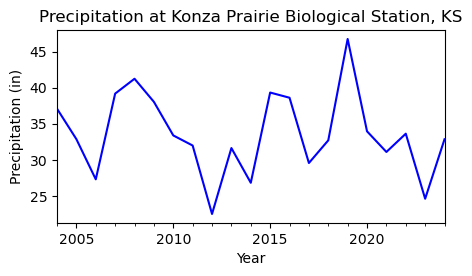

In [15]:
# Plot precipitation over time
Konza_precip0 = Konza_climate_df.PRCP.resample('YS').sum().plot(
    title='Precipitation at Konza Prairie Biological Station, KS',
    xlabel='Year',
    ylabel='Precipitation (in)',
    legend=False,
    color='blue',
    figsize=(5, 2.5))
Konza_precip0

In [ ]:
# Save as png (this line of code generated with the help of ChatGPT)
fig = Konza_precip0.get_figure()
fig.savefig('Konza_precip0.png', dpi=300, bbox_inches='tight')

In [6]:
# Resample by year
Konza_ann_prcp_df = (
    Konza_climate_df[["PRCP"]]
    .resample('YS')
    .sum()
)
Konza_ann_prcp_df

,PRCP
DATE,
2004-01-01,37.10
2005-01-01,32.88
2006-01-01,27.32
2007-01-01,39.19
2008-01-01,41.25
2009-01-01,38.05
2010-01-01,33.40
2011-01-01,32.00
2012-01-01,22.52


In [7]:
#### This code prepared with the help of ChatGPT ####
# Remove rows with missing values
Konza_clean_df = Konza_ann_prcp_df.dropna(subset=['PRCP'])

# Getting data in the correct format for scikit-learn
X = (
    Konza_clean_df
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    # Reshape 'Year' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = Konza_clean_df['PRCP'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.12048051948051956
Intercept: 276.24014718614734


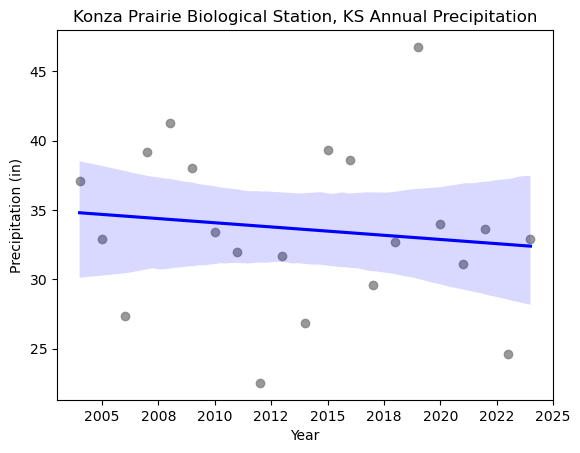

In [11]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=Konza_ann_prcp_df.index.year, 
    y=Konza_ann_prcp_df.PRCP,
    # change color (these two lines of code produced with the help of ChatGPT)
    line_kws={"color": "blue"},
    scatter_kws={"color": "gray"}
)
# Set plot labels
ax.set(
    title='Konza Prairie Biological Station, KS Annual Precipitation',
    xlabel='Year',
    ylabel='Precipitation (in)'
)
# Save the plot as an image (this line of code produced with the help of ChatGPT)
plt.savefig("Konza_precip.png", bbox_inches="tight", dpi=300)

# Get the current axes (the following 2 lines of code produced with the help of Google Gemini)
ax = plt.gca()
# "{x:.0f}" formats the number 'x' as a float with 0 decimal places
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

# Display the plot without extra text
plt.show()

In [8]:
# Save the climate data
Konza_climate_df.to_csv('Konza_climate_data')

In [ ]:
%store Konza_climate_df Konza_url